In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('C:/jupyter_home/data/student_scores_em.csv',
                 index_col='student number')
display(df.head())

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [6]:
# 영어성적을 가지고 있는 series를 생성 (10개의 데이터만 이용)
scores = df['english'][:10]
print(scores)

student number
1     42
2     69
3     56
4     41
5     57
6     48
7     65
8     49
9     65
10    58
Name: english, dtype: int64


In [7]:
# 1변수(1차원)을 가지고 있는 dataframe도 하나 생성
scores_df = pd.DataFrame(scores)
display(scores_df)

,english
student number,
1,42
2,69
3,56
4,41
5,57
6,48
7,65
8,49
9,65


In [8]:
# 영어 성적 평균 구하기
print(scores.mean())    # 55.0 (sereis의 메소드 이용)
print(np.mean(scores))  # 55.0 (numpy의 mean()함수 사용)
print(scores_df.mean()) # english    55.0
                        # dtype: float64
                        # dataframe의 메소드 이용 => 결과가 series로 나옴

55.0
55.0
english    55.0
dtype: float64


In [9]:
# 영어성적의 중위값 구하기
print(np.median(scores))  # 56.5

56.5


In [10]:
# 최빈값 구하기 
print(pd.Series([1,1,1,2,2,3]).mode())

0    1
dtype: int64


In [12]:
# 영어성적 편차구하기
deviation = scores - np.mean(scores)
print(deviation)
# student number
# 1    -13.0
# 2     14.0
# 3      1.0
# 4    -14.0
# 5      2.0
# 6     -7.0
# 7     10.0
# 8     -6.0
# 9     10.0
# 10     3.0
# Name: english, dtype: float64
print(deviation.mean())  # 편차의 평균은 무조건 0

student number
1    -13.0
2     14.0
3      1.0
4    -14.0
5      2.0
6     -7.0
7     10.0
8     -6.0
9     10.0
10     3.0
Name: english, dtype: float64


In [17]:
# 분산 = 편차의 제곱의 평균
print(np.mean(deviation**2))    # 86.0
print(np.var(deviation))        # 86.0

# dataframe모든 column에 대해서 분산 구하기
print(scores_df.var())   # english    95.555556
                         # dtype: float64

# numpy로 구한 분산과 pandas로 구한 분산이 다름
# 표본분산 : 우리가 알고 있는 분산
# 불편분산 : n으로 나누어 평균을 구하는게 아니라 n-1로 나눔
# 통계학에서 기본으로 사용하는 분산을 불편분산,,
# pandas는 불편분산 numpy는 표본분산 이용

# pandas로 표본분산 하기
print(scores_df.var(ddof=0)) 

86.0
86.0
english    95.555556
dtype: float64
english    86.0
dtype: float64


In [18]:
# 표준편차 구하기 = 분산의 제곱근
print(np.sqrt(np.var(scores)))
print(np.std(scores))

9.273618495495704
9.273618495495704


In [19]:
# IQR 구하기
# 사분위 값을 구하는 numpy 함수가 있음
Q1 = np.percentile(scores, 25)   # 1사분위
Q2 = np.percentile(scores, 50)   # 2사분위
Q3 = np.percentile(scores, 75)   # 3사분위

IQR = Q3-Q1
print(IQR)

15.0


In [24]:
# 영어성적으로 도수분포표 만들기
en_scores = df['english'].values
print(en_scores)
# [42 69 56 41 57 48 65 49 65 58 70 47 51 64 62 70 71 68 73 37 65 65 61 52
#  57 57 75 61 47 54 66 54 54 42 37 79 56 62 62 55 63 57 57 67 55 45 66 55
#  64 66]

# 특정 구간에 몇개의 데이터가 포함되는지 알려주는 numpy 함수
freq,tmp = np.histogram(en_scores, bins=10, range=(0,100))
print(tmp)  # 경계값 = [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
print(freq) # 각 bin안의 도수(frequency) = [ 0  0  0  2  8 16 18  6  0  0]

[42 69 56 41 57 48 65 49 65 58 70 47 51 64 62 70 71 68 73 37 65 65 61 52
 57 57 75 61 47 54 66 54 54 42 37 79 56 62 62 55 63 57 57 67 55 45 66 55
 64 66]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
[ 0  0  0  2  8 16 18  6  0  0]


In [28]:
# dataframe으로 도수분포표 표현하기

# 먼저 행 index만들기 (list comprehension)
freq_class = [str(i)+'~'+str(i+10) for i in range(0,100,10)]
print(freq_class)
# ['0~10', '10~20', '20~30', '30~40', '40~50', '50~60', '60~70', '70~80', '80~90', '90~100']

freq_dist_df = pd.DataFrame({'Frequency':freq},
                           index=freq_class)
display(freq_dist_df)

['0~10', '10~20', '20~30', '30~40', '40~50', '50~60', '60~70', '70~80', '80~90', '90~100']


,Frequency
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0
90~100,0


In [29]:
# class mark
class_mark = [(i+(i+10))/2 for i in range(0,100,10)]
freq_dist_df['class_mark'] = class_mark

display(freq_dist_df)

# 상대 도수(relative frequency)
rel_freq = freq/ freq.sum()
freq_dist_df['rel_freq'] = rel_freq
display(freq_dist_df)

,Frequency,class_mark
0~10,0,5.0
10~20,0,15.0
20~30,0,25.0
30~40,2,35.0
40~50,8,45.0
50~60,16,55.0
60~70,18,65.0
70~80,6,75.0
80~90,0,85.0
90~100,0,95.0


,Frequency,class_mark,rel_freq
0~10,0,5.0,0.00
10~20,0,15.0,0.00
20~30,0,25.0,0.00
30~40,2,35.0,0.04
40~50,8,45.0,0.16
50~60,16,55.0,0.32
60~70,18,65.0,0.36
70~80,6,75.0,0.12
80~90,0,85.0,0.00
90~100,0,95.0,0.00


In [30]:
# 누적 상대도수
print(rel_freq)
print(np.cumsum(rel_freq))
freq_dist_df['cum_rel_freq'] = np.cumsum(rel_freq)

display(freq_dist_df)

[0.   0.   0.   0.04 0.16 0.32 0.36 0.12 0.   0.  ]
[0.   0.   0.   0.04 0.2  0.52 0.88 1.   1.   1.  ]


,Frequency,class_mark,rel_freq,cum_rel_freq
0~10,0,5.0,0.00,0.00
10~20,0,15.0,0.00,0.00
20~30,0,25.0,0.00,0.00
30~40,2,35.0,0.04,0.04
40~50,8,45.0,0.16,0.20
50~60,16,55.0,0.32,0.52
60~70,18,65.0,0.36,0.88
70~80,6,75.0,0.12,1.00
80~90,0,85.0,0.00,1.00
90~100,0,95.0,0.00,1.00


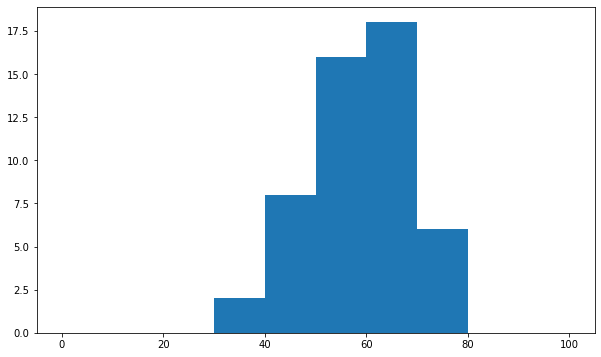

In [32]:
# 히스토그램 그리기
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,6))
ax = figure.add_subplot(1,1,1)
ax.hist(en_scores, bins=10, range=(0,100))
plt.show()

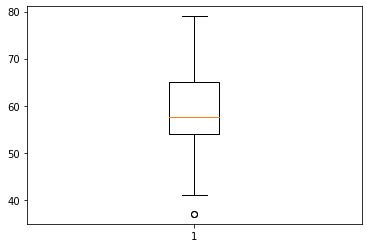

In [34]:
# boxplot
plt.boxplot(en_scores)
plt.show()

In [41]:
#2차원 데이터를 이용해서 수치지표와 그래프 표현
# scatter 
en_scores = df['english'][:10]
ma_scores = df['mathematics'][:10]

scores_df= pd.DataFrame({'english':en_scores.values,
                         'mathematics':ma_scores.values},
                        index=['A','B','C','D','E','F','G','H','I','J'])
display(scores_df)

,english,mathematics
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78
J,58,82


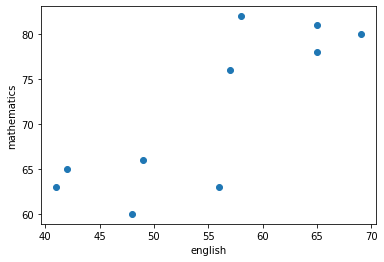

55.0 , 71.4


In [44]:
plt.scatter(en_scores,ma_scores)
plt.xlabel('english')
plt.ylabel('mathematics')

plt.show()

# 영어와 수학의 평균 
print(en_scores.mean(),",",ma_scores.mean())  # 55.0 71.4